# PyTorch Exploration
## Image classification on dogs, cats, and foxes utilizing Lab 10's premise but with PyTorch tools
### Goal here is to use data from a third-party source in order to classify personal images that I used as well as some experimentation with certain special tools found in PyTorch
* Name: Jason Lu
* Date: December 2, 2024
* Class: CSC 295-002

### The main purpose of PyTorch is to build deep learning models for image and language processing. This leads to lots of applications for uses. PyTorch was created on September 2016, and its current version is 2.5.1 [9]. Similar packages to PyTorch include TensorFlow, Keras, and sklearn. The main difference between PyTorch and similar packages to PyTorch is its usage of GPUs to boost computational efficiency when building deep learning models. The usage of GPUs are optional as it will default to using the CPU when there are no GPUs detected by PyTorch. Some packages that may be needed alongside PyTorch are OS, Matplotlib, and NumPy. This is since OS allows us to use the local file system through file paths and Matplotlib helps visualize data processed from PyTorch. NumPy is also necessary to rearrange the image vectors that are in the tuples. PyTorch requires Python 3.9 or later, and to use the GPUs, it requires a CUDA toolkit version of 11.x or lower [9]. 

In [64]:
import sys
print(sys.executable)

C:\Users\jason\anaconda3\python.exe


In [65]:
# Importing main package(s) to be used: PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn.functional as F
from torchvision.io import read_image
from torchvision.transforms import v2

# Other packages to be used to help for analysis
import os
import matplotlib.pyplot as plt
import numpy as np

In [66]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Web References for Usage:
* [1] https://www.kaggle.com/datasets/snmahsa/animal-image-dataset-cats-dogs-and-foxes/data 
* [2] https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
* [3] https://pytorch.org/vision/0.9/transforms.html
* [4] https://pytorch.org/docs/stable/data.html
* [5] https://pytorch.org/tutorials/beginner/nn_tutorial.html#neural-net-from-scratch-without-torch-nn
* [6] https://machinelearningmastery.com/training-a-pytorch-model-with-dataloader-and-dataset/
* [7] https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
* [8] https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html
* [9] https://pytorch.org/
* [10] https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py
* [11] https://pytorch.org/vision/0.19/generated/torchvision.io.read_image.html
* [12] https://numpy.org/doc/2.1/reference/generated/numpy.transpose.html

### So here we are loading our training and testing datasets here of cats, dogs, and foxes. The training data came from a third party source [1]. The testing data came from my collection of images. I used a transform to ensure that the image sizes would be the same size for all images to avoid errors and to ensure that they would all have only 4 channels for color. This transform converts the image back to a Tensor format. 

### To process each image, I used the OS path and then used a PyTorch read_image on it, and I turned it into a PIL Image to make it simple to call a transform on it to standardize the image [11]. It checks for the label from the file in which the picture is in. These datasets are lists to hold tuples of an image and a label indicating a cat, dog, or fox. I used Lab 10's techniques in terms of OS to help load in the datasets. 

### If I were to redo this project in the future, I would instead make this be "RGB" to ensure that PyTorch tools work better with the images, meaning this would be 3 channels of color (RGB) rather than 4 channels of color (RGBA).

In [67]:
# load train_dataset of cats, dogs, and foxes
train_dataset = []

transform = transforms.Compose([
    transforms.Lambda(lambda x: x.convert("RGBA")),
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
])

for label in ['cat', 'dog', 'fox']: 
    img_path = os.path.join('./dataset', str(label))
    for img in os.listdir(img_path):
        tensor_image = read_image(os.path.join(img_path, img))
        pil_image = transforms.ToPILImage()(tensor_image)
        image = transform(pil_image)
        number = 0
        if label == 'dog':
            number = 1
        if label == 'fox':
            number = 2
        train_dataset.append((image, number))

# Load test_data_set of 1 cat, 1 dog, and 1 fox
test_dataset = []

for label in ['cat', 'dog', 'fox']: 
    img_path = os.path.join('./testfiles', str(label))
    for img in os.listdir(img_path):
        tensor_image = read_image(os.path.join(img_path, img))
        pil_image = transforms.ToPILImage()(tensor_image)
        image = transform(pil_image)
        number = 0
        if label == 'dog':
            number = 1
        if label == 'fox':
            number = 2
        test_dataset.append((image, number))

print('The number of Training Data: ', len(train_dataset), flush=True)
print('The number of Test Data: ', len(test_dataset), flush=True)

The number of Training Data:  308
The number of Test Data:  3


### Here we create an DataLoader object from PyTorch using the training dataset [2, 4].

In [68]:
# Create DataLoader for training data
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, num_workers=4, pin_memory=True, shuffle=True)

### Here we are processing the DataLoader for the training dataset by displaying all of its pictures in batch sizes of 16. We call .squeeze() on img to reduce the dimensions of the images from 4 to 3 for displaying them later. We use np.transpose to get the img in the correct formatting in order to avoid errors while displaying the pictures [12]. We do this to ensure that all pictures seem to have the appropriate size and see if color changes. 

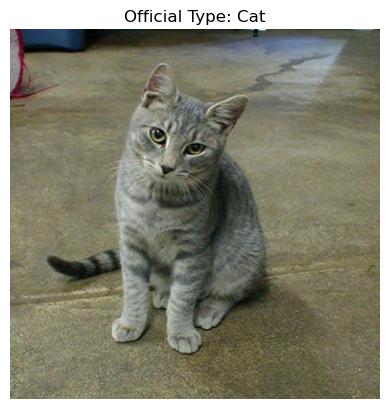

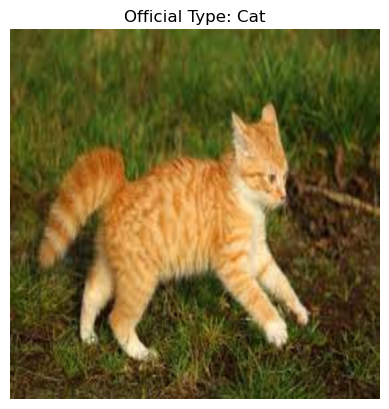

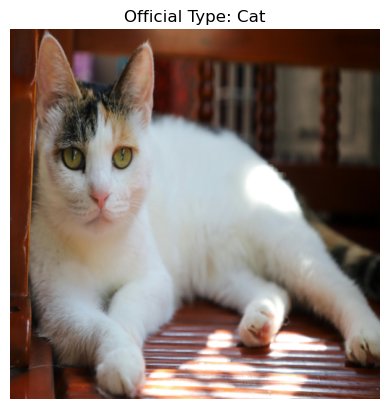

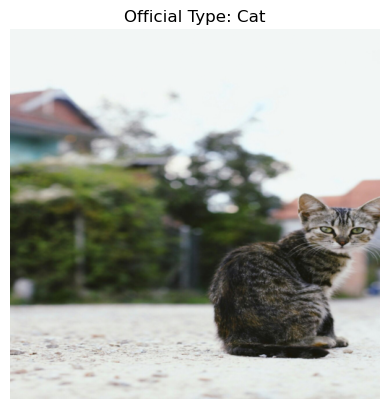

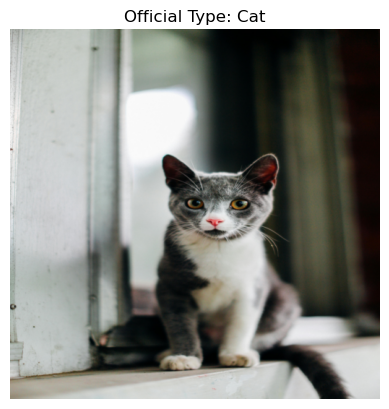

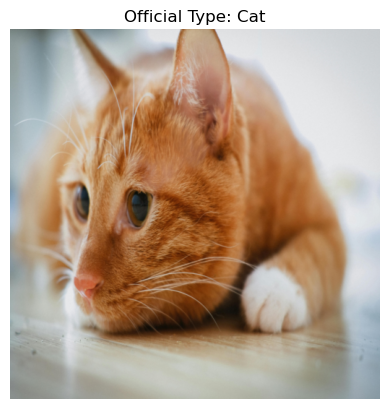

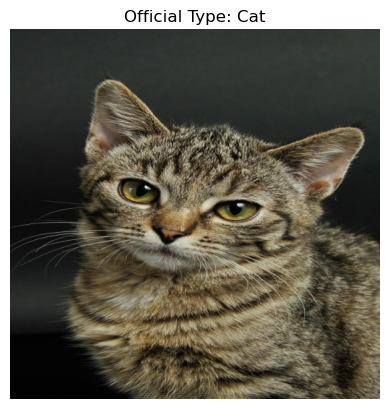

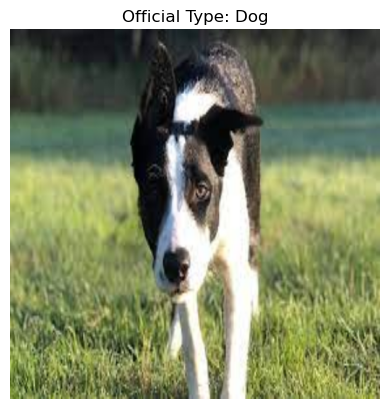

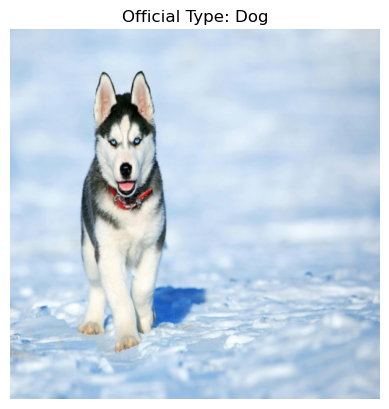

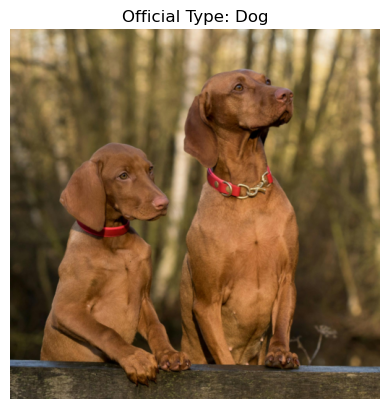

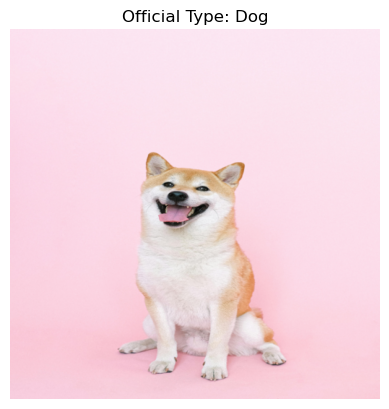

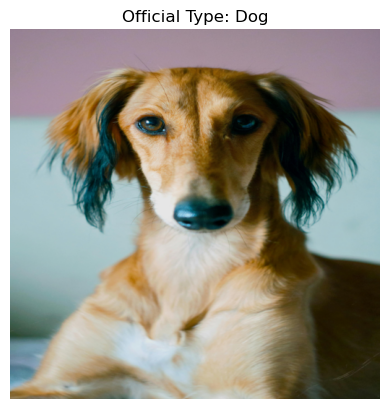

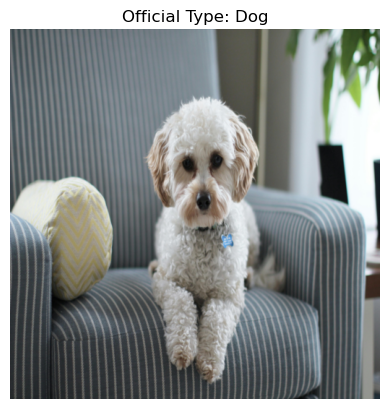

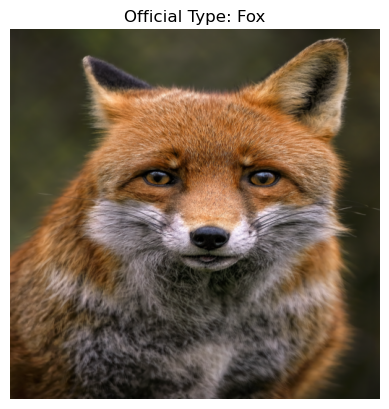

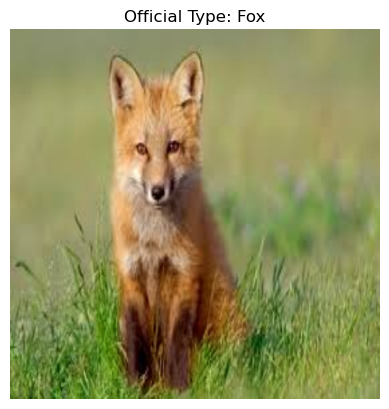

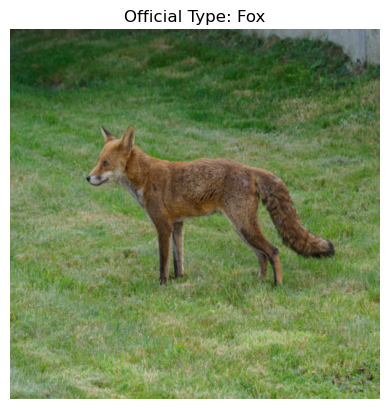

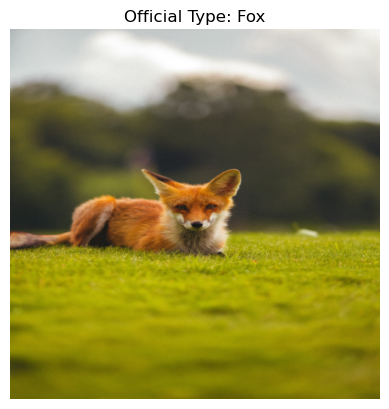

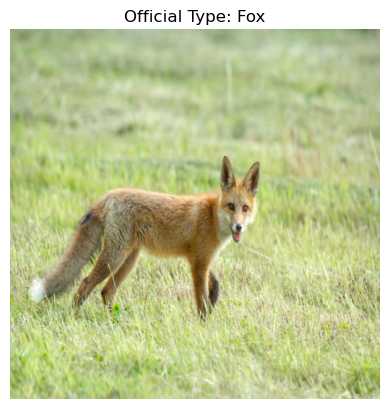

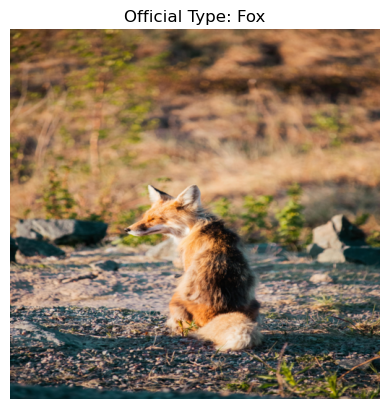

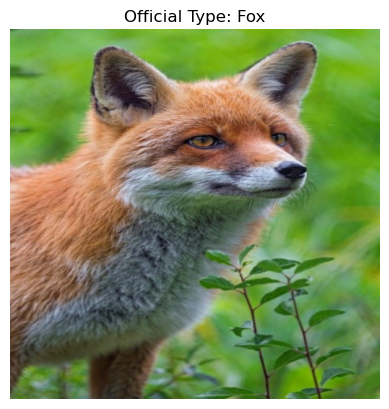

In [69]:
# Process training DataLoader
for data in iter(train_dataloader):
    picture, label = data
    test = picture[0]
    img = test.squeeze(0)
    img = np.transpose(img, (1, 2, 0))
    testlabel = label[0]
    newlabel = 'Cat'
    if testlabel == 1:
        newlabel = 'Dog'
    if testlabel == 2:
        newlabel = 'Fox'
    plt.axis('off')
    plt.title(f"Official Type: {newlabel}")
    plt.imshow(img)
    plt.show()


### Here we create an DataLoader object from PyTorch using the testing dataset [2, 4].

In [70]:
# Create DataLoader for testing data
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

### Here we are processing the DataLoader for the testing dataset by displaying all of its pictures in batch sizes of 32. We call .squeeze() on img to reduce the dimensions of the images from 4 to 3 for displaying them later. We use np.transpose to get the img in the correct formatting in order to avoid errors while displaying the pictures. We do this to ensure that all pictures seem to have the appropriate size and see if color changes. 

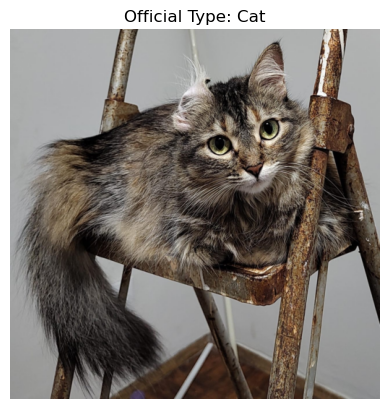

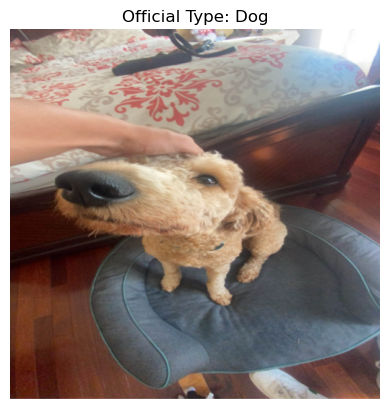

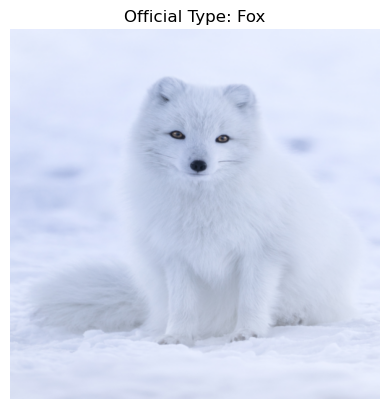

In [71]:
# Process testing DataLoader
for data in iter(test_dataloader):
    picture, label = data
    test = picture[0]
    img = test.squeeze(0)
    img = np.transpose(img, (1, 2, 0))
    testlabel = label[0]
    newlabel = 'Cat'
    if testlabel == 1:
        newlabel = 'Dog'
    if testlabel == 2:
        newlabel = 'Fox'
    plt.axis('off')
    plt.title(f"Official Type: {newlabel}")
    plt.imshow(img)
    plt.show()

### This took me a while to debug, but we will consider an example given to help build this Neural Network for training the training data's DataLoader [5, 6, 7]. We used the example, and we modified it by considering matrix multiplication. Matrices can only be multipled when {a x b}, {b x c}, with the left element being a row and the right element of being a column. We will use nn.Linear to establish the Neural Network. Therefore, there are 1048576 pixel values in each batch, and we can create 512 neurons for each batch. We set 3 as the number of classifiers, and they are cat, dog, and fox. The forward function uses the input data to further process and train itself from the data. 
### This neural network uses convolutional layers to form a convolutional neural network to potentially increase accuracy hopefully. 

In [72]:
# Class that holds local NeuralNetwork
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=4, out_channels=32, kernel_size=3, stride=1, padding=1)  # in_channels=4
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)  # 64 filters
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # 2x2 max-pooling

        # Fully connected layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 128 * 128, 512)  # Corrected input size
        self.fc2 = nn.Linear(512, 3)  # 3 output classes

    def forward(self, x):
        # Pass through convolutional layers with ReLU activations and pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten the output and pass through fully connected layers
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### After building the Neural Network, a training loop is established here [6, 7, 8]. I set the number of epochs to 25 to avoid my computer from having all of its memory be used and to maintain a decent runtime while trying to be able to predict the classifiers. This means the training will iterate 25 times for the training data's DataLoader. I called the Neural Network from above, so it can be set to .train() using nn.Module. I used nn.CrossEntropyLoss() for the loss function to determine if the predictions are incorrect. We use a .backward() to calculate inaccuracies for this loss function. The forward in this case is in the Neural Network class itself to use input data to try to create predictions. The optimizer's zero_grad() call is to correctly update the Neural Network. The optimizer's step is to process a part of the training data before the next iteration. 

In [73]:
# Training loop for the local NeuralNetwork
model = NeuralNetwork()
model.to(device)

n_epochs = 25
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(0, n_epochs):
    model.train()
    for images, labels in train_dataloader:
        # Move data to the same device as the model
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        y_pred = model(images)
        
        # Compute loss
        loss = loss_fn(y_pred, labels.squeeze())
        
        # Zero gradients, backprop, update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

### This is where we will evaluate the accuracy of the local Neural Network's predictions for the image classifiers by using the test DataHolder [7, 8]. We use .argmax(1) here to determine if the labels exists, then go check for specific lanels like cats, dogs, or foxes to show the right picture. 

Correct: Cat Picture


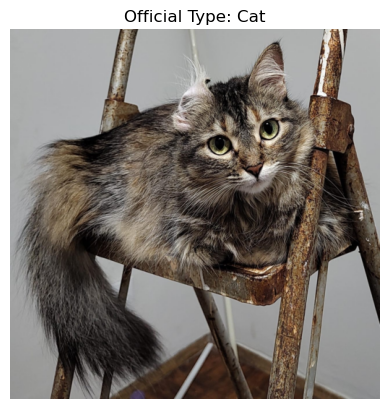

Correct: Dog Picture


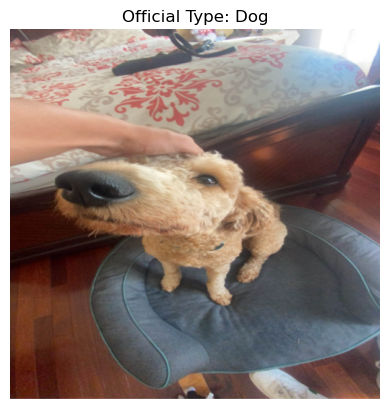

Correct: Fox Picture


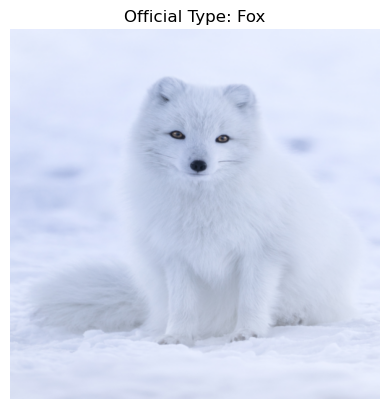

In [74]:
# Evaluate accuracy of local NeuralNetwork by using testing DataLoader
correct = 0
total = 3 # we have 3 pictures to use

with torch.no_grad():
    for images, labels in test_dataloader:
        # Move data to the same device as the model (GPU if available)
        images, labels = images.to(device), labels.to(device)

        # Get model predictions
        y_pred = model(images)

        # Calculate correct predictions
        correct += (y_pred.argmax(1) == labels).type(torch.float).sum().item()
        
        # Show images and corresponding labels
        for i in range(len(labels)):
            img = images[i].squeeze(0)  # Remove batch dimension
            img = np.transpose(img.cpu(), (1, 2, 0))  # Move image to CPU and change from (C, H, W) to (H, W, C)
            
            # Get the predicted and true label
            true_label = labels[i].item()
            predicted_label = y_pred.argmax(1)[i].item()

            # Print and plot the image with its label
            if true_label == 0:
                print(f'Correct: Cat Picture')
                plt.title(f"Official Type: Cat")
            elif true_label == 1:
                print(f'Correct: Dog Picture')
                plt.title(f"Official Type: Dog")
            elif true_label == 2:
                print(f'Correct: Fox Picture')
                plt.title(f"Official Type: Fox")

            plt.axis('off')  # Hide axes
            plt.imshow(img)
            plt.show()

### This here prints out the total accuracy of the local Neural Network by using the correctly predicted test cases divided by the total number of test cases. Unfortunately, the accuracy is pretty low, and some factors include the differing environments in which the cats, dogs, and foxes are in. In addition, the cats, dogs, and foxes may be of overlapping colors. This might affect the training of the data. Additionally, not having enough neurons to analyze for patterns and representations may also be a factor. 

In [75]:
# Calculate total accuracy of the local NeuralNetwork
accuracy = correct / total * 100
print(f"Prediction Accuracy: {accuracy:.2f}%")

Prediction Accuracy: 33.33%


### I try out a new tool from PyTorch to invert the image that was successfully predicted [3, 10]. I made a transform for use in the next few cells to help convert the image from 4 channels to 3 channels for PyTorch tools to successfully use without errors and to convert back to Tensor for usage [10]. We use np transpose again to reformat the shape of the image to avoid errors for the next few cells [12].

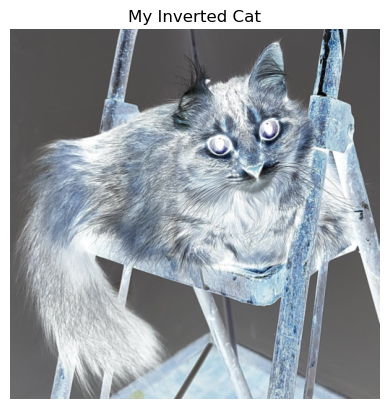

In [76]:
# Test out special tool from PyTorch that inverts images
usecase = test_dataloader.dataset[0]
invert_picture, _ = usecase

new_transform = transforms.Compose([
    transforms.Lambda(lambda x: x.convert("RGB")),
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
])

pil_image_test = transforms.ToPILImage()(invert_picture)
invert_picture = new_transform(pil_image_test)
transformer = v2.RandomInvert()
invert_picture = transformer(invert_picture)
invert_picture = np.transpose(invert_picture, (1, 2, 0))
plt.axis('off')
plt.title(f"My Inverted Cat")
plt.imshow(invert_picture)
plt.show()

### I try out a new tool from PyTorch to put a perspective in the image that was successfully predicted [3, 10]. 

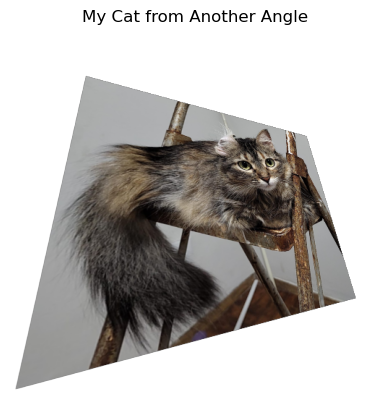

In [77]:
perspective_picture, _ = usecase

perspective_transformer = v2.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_picture = perspective_transformer(perspective_picture)
perspective_picture = np.transpose(perspective_picture, (1, 2, 0))
plt.axis('off')
plt.title(f"My Cat from Another Angle")
plt.imshow(perspective_picture)
plt.show()

### I try out a new tool from PyTorch to randomly jitter the image that was successfully predicted [3, 10]. 

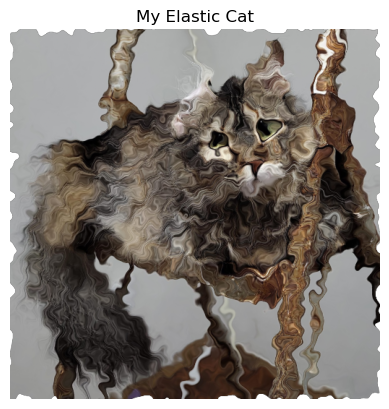

In [78]:
elastic_picture, _ = usecase

elastic_transformer = v2.ElasticTransform(alpha=250.0)
elastic_picture = elastic_transformer(elastic_picture)
elastic_picture = np.transpose(elastic_picture, (1, 2, 0))
plt.axis('off')
plt.title(f"My Elastic Cat")
plt.imshow(elastic_picture)
plt.show()

## Advantages:
### It has lots of tools to manipulate not only images and conduct image classifications but also to perform numerous other features, such as audio processing. Unfortunately, I will not have time to explore that, so I will instead explore the image features primarily. The usage of Tensors as a standard array just like np arrays standardizes its ability to be used for numerous purposes. Additionally, the usage of Graphs also strengthens its ability to process data that requires networks, such as path finding algorithms to create a path after calculating obstacles. I did not explore Graphs though unfortunately in this project. PyTorch's attempts to negate Python's lack of computational efficiency by using Tensors and GPUs makes it stand out for performance. 

## Disadvantages:
### Despite the large user base providing many documentations and examples, it has a high learning curve. It is hard to master using PyTorch as there are so much features to consider and integrate with other Python libraries. It also has lower computational efficiency if the computer used does not have a good CPU to keep up as it can take up 100% of the CPU when processing data, especially training the data. It essentially requires you to get a strong GPU which may be costly. 

## My final thoughts:
### Fortunately, when making this project using PyTorch, I did not encounter any bugs. The documentation for PyTorch is vast, making it helpful to build this project instead of attempting to think from scratch. The most difficult part when test driving it is lacking the knowledge for PyTorch which consumed a significant amount of time as I needed to learn why certain functions work or do not work when called. I also needed to learn how to build a basic Neural Network from scratch to do the most important components for the project, and I needed to review some matrice principles such as correct matrix multiplication. Looking back on PyTorch, it is indeed effective for image processing. PyTorch did seem to be unable to adjust its formatting for Tensors, so I had to use NumPy to assist me with that to ensure image processing without errors. 

### In terms of performance, GPUs are extremely effective in reducing the run time of training this image data set. It took from approximately 15 minutes of run time using a CPU to approximately 2-3 minutes of run time using a GPU. 